### Load Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [20, 10]

# Gathering Data


### Load Datasets, Toxicity & Aggression


In [2]:
filepath = "../../../Documents/"
aggression = filepath+"Aggression/"
toxicity = filepath+"Toxicity/"
toxic_annotated_comments = pd.read_csv(toxicity+"toxicity_annotated_comments.tsv", sep='\t')
toxic_annotations = pd.read_csv(toxicity+"toxicity_annotations.tsv", sep='\t')
toxic_demographics = pd.read_csv(toxicity+"toxicity_worker_demographics.tsv", sep= '\t')
agg_annotated_comments = pd.read_csv(aggression+"aggression_annotated_comments.tsv", sep='\t')
agg_annotations = pd.read_csv(aggression+"aggression_annotations.tsv", sep='\t')
agg_demographics = pd.read_csv(aggression+"aggression_worker_demographics.tsv", sep= '\t')


In [3]:
toxic_annotations

,rev_id,worker_id,toxicity,toxicity_score
0,2232.0,723,0,0.0
1,2232.0,4000,0,0.0
2,2232.0,3989,0,1.0
3,2232.0,3341,0,0.0
4,2232.0,1574,0,1.0
...,...,...,...,...
1598284,699897151.0,1550,0,0.0
1598285,699897151.0,1025,0,1.0
1598286,699897151.0,648,0,1.0
1598287,699897151.0,379,0,0.0


### What is inside the [Datasets](https://meta.wikimedia.org/wiki/Research:Detox/Data_Release)? 

In [4]:
toxic_df = toxic_annotations.merge(toxic_annotated_comments, on= 'rev_id', how = 'left').merge(toxic_demographics, on = 'worker_id', how = 'left')
toxic_df.head()

,rev_id,worker_id,toxicity,toxicity_score,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,male,1.0,18-30,hs
2,2232.0,3989,0,1.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,18-30,bachelors
3,2232.0,3341,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,30-45,bachelors


In [5]:
#Some worker ids not included in toxic demographics
len(set(toxic_annotations.worker_id) - set(toxic_demographics.worker_id))

710

In [6]:
aggressions_df = agg_annotations.merge(agg_annotated_comments, on= 'rev_id', how = 'left').merge(agg_demographics, on = 'worker_id', how = 'left')
aggressions_df.head()

,rev_id,worker_id,aggression,aggression_score,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,0.0,18-30,hs
4,37675,170,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,NaN,NaN,NaN,NaN


In [7]:
#Some worker ids not included in toxic demographics
len(set(agg_annotations.worker_id) - set(agg_demographics.worker_id))

1863

# Research Questions

## How has toxicity and aggression changed over time?

### Toxicity

Toxicity is measured two ways.  We can see the ratio of toxic comments vs non toxic comments over time, and the average toxicity score over time.  Toxicity is a binary value column that we can do a count over number of rows to find the ratio toxic comments.  Toxicity Score is a quantitative value ranging from -2 to 2 with negative values indicating a more toxic comment.  For visualization purposes, to keep higher y axis values indicating greater toxicity, toxicity scores will be reversed.

In [8]:
toxic_df.head()

,rev_id,worker_id,toxicity,toxicity_score,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,2232.0,723,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,30-45,bachelors
1,2232.0,4000,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,male,1.0,18-30,hs
2,2232.0,3989,0,1.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,18-30,bachelors
3,2232.0,3341,0,0.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,NaN,NaN,NaN,NaN
4,2232.0,1574,0,1.0,This:NEWLINE_TOKEN:One can make an analogy in ...,2002,True,article,random,train,female,0.0,30-45,bachelors


Text(0.5, 1.0, 'Toxicity Score Distribution')

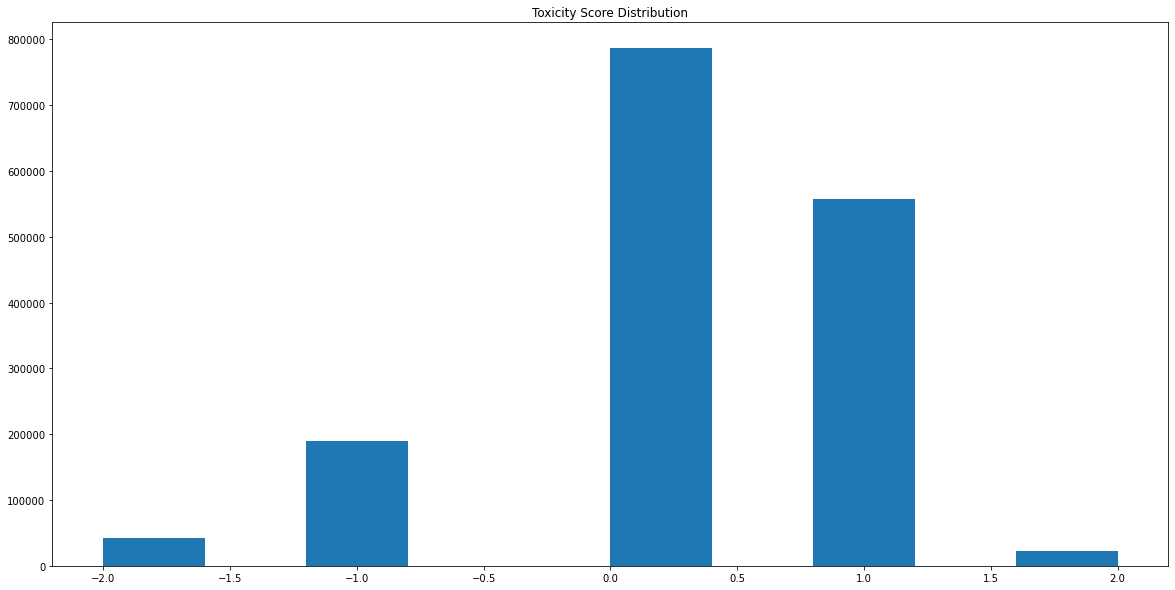

In [9]:
plt.hist(toxic_df.toxicity_score)
plt.title("Toxicity Score Distribution")

Toxicity Scores appear to have more positive or healthy comments than toxic comments

### Lets first look at a general time trend of the entire dataset on a per year basis

#### Preprocessing

In [10]:
col_rename = {'rev_id':'count'}
toxic_df_trend = toxic_df.groupby('year').agg({'rev_id':'count', 'toxicity':'sum', 'toxicity_score':'mean'}).reset_index().rename(columns = col_rename)
toxic_df_trend['toxicity_ratio'] = toxic_df_trend['toxicity'] / toxic_df_trend['count']
toxic_df_trend['toxicity_score_reversed'] = -1 * toxic_df_trend['toxicity_score']
toxic_df_trend.head()



,year,count,toxicity,toxicity_score,toxicity_ratio,toxicity_score_reversed
0,2001,60,2,0.333333,0.033333,-0.333333
1,2002,831,29,0.446450,0.034898,-0.446450
2,2003,2918,165,0.369088,0.056546,-0.369088
3,2004,12135,742,0.360280,0.061145,-0.360280
4,2005,69620,8903,0.238006,0.127880,-0.238006


#### Toxicity Ratio

Text(0.5, 1.0, 'Toxicity Ratio Over Time')

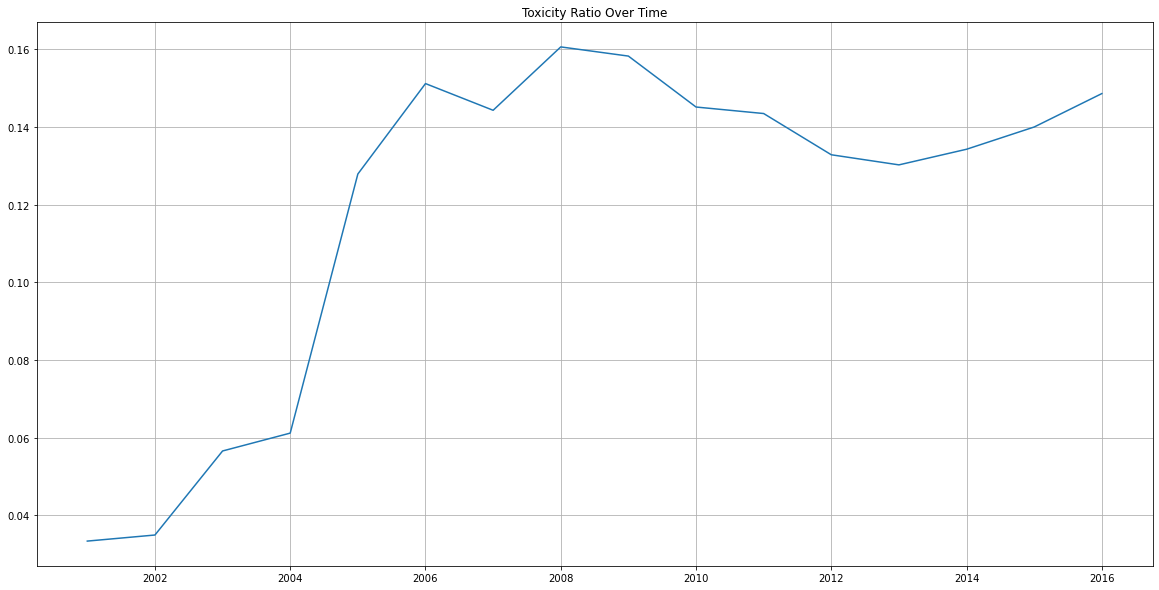

In [11]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_ratio)
plt.grid(True)
plt.title("Toxicity Ratio Over Time")

#### Toxicity Score

Text(0.5, 1.0, 'Toxicity Score Over Time')

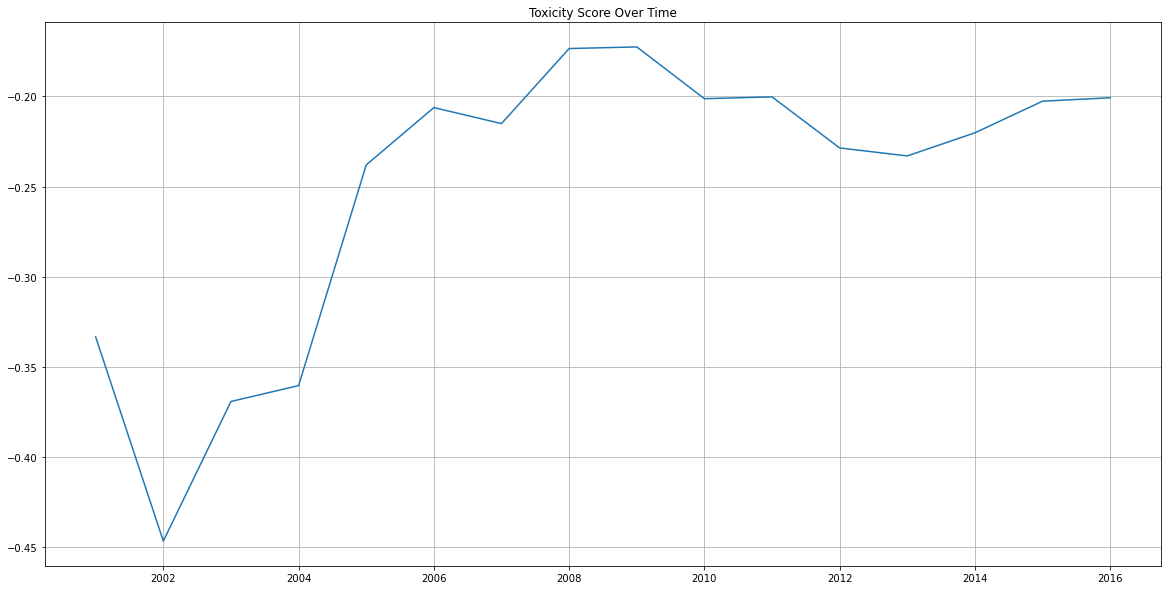

In [12]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_score_reversed)
plt.grid(True)
plt.title("Toxicity Score Over Time")

Interestingly, there appears to be a rapid increase in both the average toxicity score and the ratio of toxic comments from the beginning of the dataset to around 2008.  However, the rates appear to flat out remaining consistent in later years.
My next question is, how do these results change for a user that was logged in vs not logged in? 

### Lets look at the difference of loging in vs not logging in

#### Preprocessing

In [13]:
col_rename = {'rev_id':'count'}
toxic_df_trend_logged_in = toxic_df[toxic_df.logged_in == True].groupby('year').agg({'rev_id':'count', 'toxicity':'sum', 'toxicity_score':'mean'}).reset_index().rename(columns = col_rename)
toxic_df_trend_logged_in['toxicity_ratio'] = toxic_df_trend_logged_in['toxicity'] / toxic_df_trend_logged_in['count']
toxic_df_trend_logged_in['toxicity_score_reversed'] = -1 * toxic_df_trend_logged_in['toxicity_score']
toxic_df_trend_not_logged_in = toxic_df[toxic_df.logged_in == False].groupby('year').agg({'rev_id':'count', 'toxicity':'sum', 'toxicity_score':'mean'}).reset_index().rename(columns = col_rename)
toxic_df_trend_not_logged_in['toxicity_ratio'] = toxic_df_trend_not_logged_in['toxicity'] / toxic_df_trend_not_logged_in['count']
toxic_df_trend_not_logged_in['toxicity_score_reversed'] = -1 * toxic_df_trend_not_logged_in['toxicity_score']



#### Toxicity Ratio Log In

Text(0.5, 1.0, 'Toxicity Ratio Overtime')

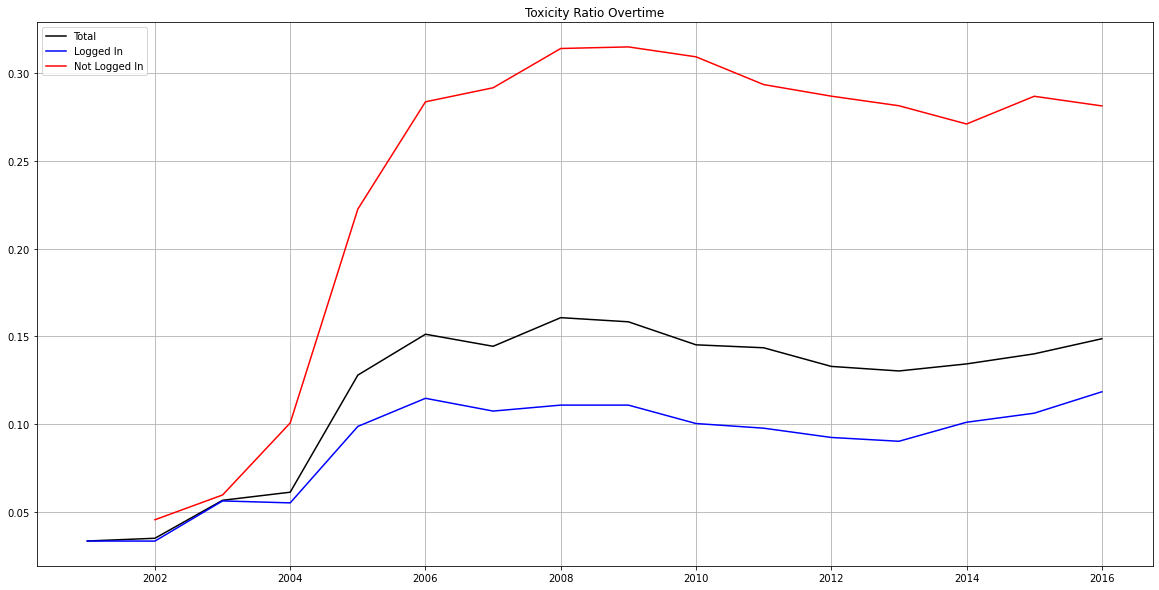

In [14]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_ratio, color = 'black', label ='Total')
plt.plot(toxic_df_trend_logged_in.year, toxic_df_trend_logged_in.toxicity_ratio, color = 'blue', label ='Logged In')
plt.plot(toxic_df_trend_not_logged_in.year, toxic_df_trend_not_logged_in.toxicity_ratio, color = 'red', label ='Not Logged In')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Toxicity Ratio Overtime")

#### Toxicity Score Log In

Text(0.5, 1.0, 'Toxicity Score Over Time')

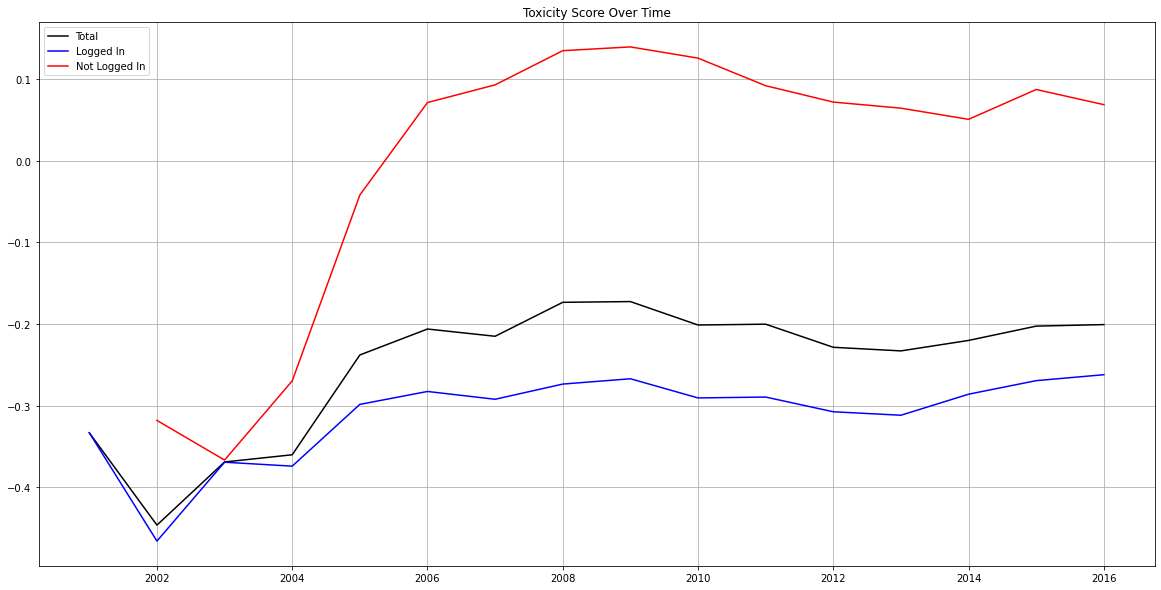

In [15]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_score_reversed, color = 'black', label ='Total')
plt.plot(toxic_df_trend_logged_in.year, toxic_df_trend_logged_in.toxicity_score_reversed, color = 'blue', label ='Logged In')
plt.plot(toxic_df_trend_not_logged_in.year, toxic_df_trend_not_logged_in.toxicity_score_reversed, color = 'red', label ='Not Logged In')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Toxicity Score Over Time")

There appears to be a big difference in both the scoring and ratio when the user is logged in or not.  On the years after 2005 for the not logged in group, the average (reversed) toxicity score turns positive, while remaining a ratio of less than 0.5, indicating that the comments are very high in toxicity for users not logged in. The overall shape of the curves remain consistent with the total, regardless of whether the user was logged in or not.

The next question is how do the results look for the different samplings? There are two different samples in the dataset.  One sample was collected randomly, and the other sample was collected from blocked samples that were blocked for violating policy whether it be for harassment or for personal attacks. 

### Lets look at the difference of sampling methods

#### Preprocessing

In [16]:

col_rename = {'rev_id':'count'}
toxic_df_trend_blocked = toxic_df[toxic_df['sample'] == 'blocked'].groupby('year').agg({'rev_id':'count', 'toxicity':'sum', 'toxicity_score':'mean'}).reset_index().rename(columns = col_rename)
toxic_df_trend_blocked['toxicity_ratio'] = toxic_df_trend_blocked['toxicity'] / toxic_df_trend_blocked['count']
toxic_df_trend_blocked['toxicity_score_reversed'] = -1 * toxic_df_trend_blocked['toxicity_score']
toxic_df_trend_random = toxic_df[toxic_df['sample'] == 'random'].groupby('year').agg({'rev_id':'count', 'toxicity':'sum', 'toxicity_score':'mean'}).reset_index().rename(columns = col_rename)
toxic_df_trend_random['toxicity_ratio'] = toxic_df_trend_random['toxicity'] / toxic_df_trend_random['count']
toxic_df_trend_random['toxicity_score_reversed'] = -1 * toxic_df_trend_random['toxicity_score']



#### Toxicity Ratio Sampling

Text(0.5, 1.0, 'Toxicity Ratio Overtime')

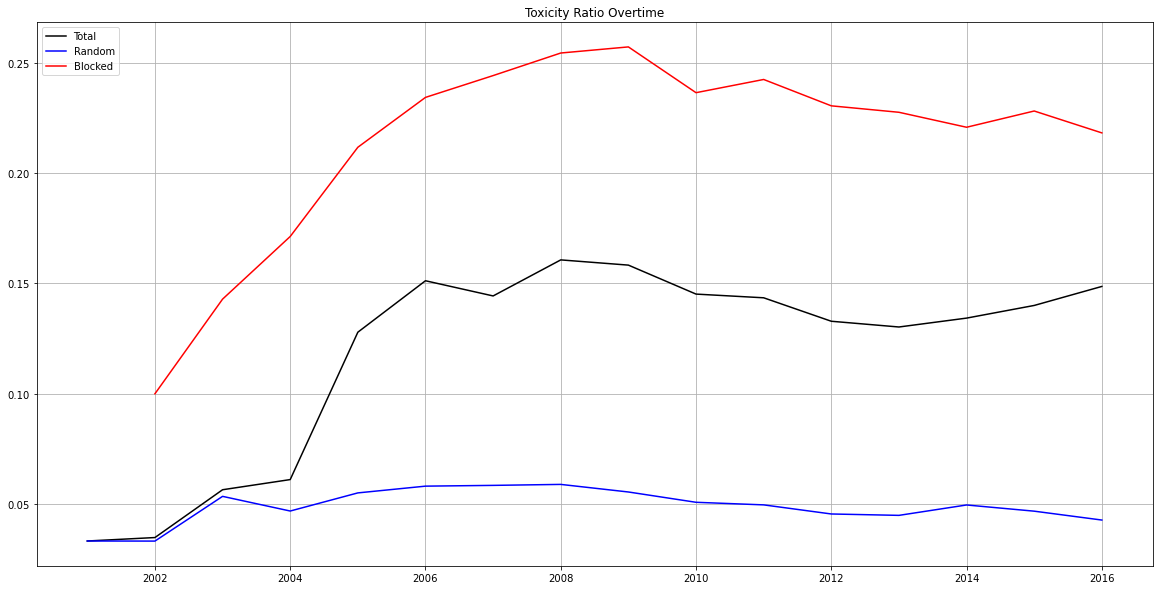

In [17]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_ratio, color = 'black', label ='Total')
plt.plot(toxic_df_trend_random.year, toxic_df_trend_random.toxicity_ratio, color = 'blue', label ='Random')
plt.plot(toxic_df_trend_blocked.year, toxic_df_trend_blocked.toxicity_ratio, color = 'red', label ='Blocked')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Toxicity Ratio Overtime")

#### Toxicity Score Sampling

Text(0.5, 1.0, 'Toxicity Score Over Time')

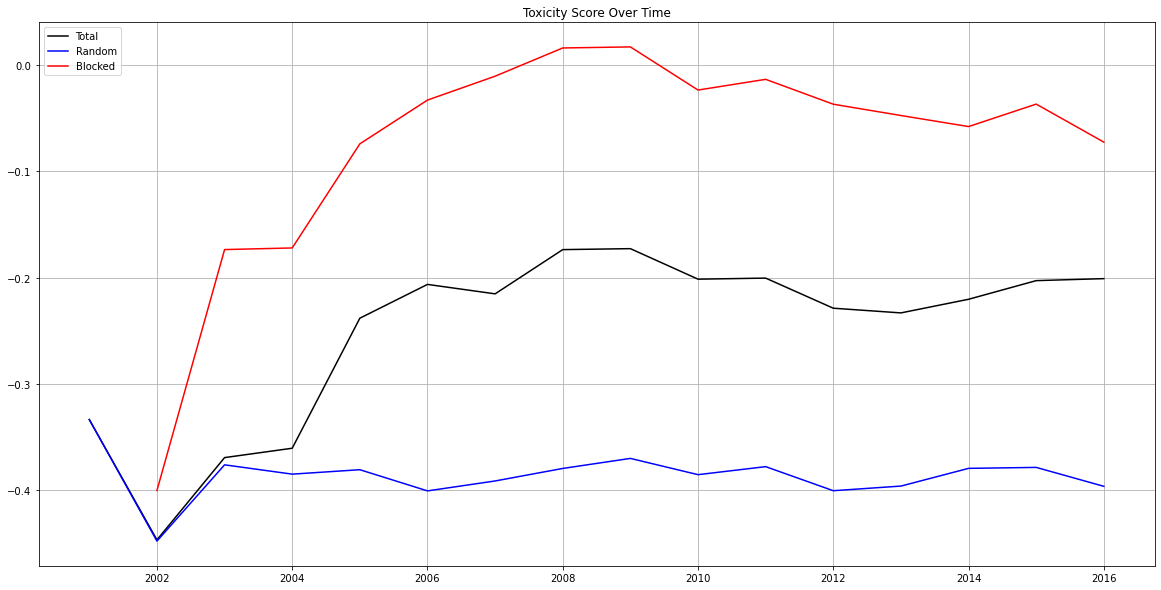

In [18]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(toxic_df_trend.year, toxic_df_trend.toxicity_score_reversed, color = 'black', label ='Total')
plt.plot(toxic_df_trend_random.year, toxic_df_trend_random.toxicity_score_reversed, color = 'blue', label ='Random')
plt.plot(toxic_df_trend_blocked.year, toxic_df_trend_blocked.toxicity_score_reversed, color = 'red', label ='Blocked')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Toxicity Score Over Time")

There appears to be a big difference in both the scoring and ratio when the sampling is done from blocked sources or when it is collected randomly.  When sampled from blocked sources, the toxicity score turns positive right on its peak at 2008, but drops to negative values after 2009.  When the sample is picked randomly, the overall trend is different in that it remains consistent throughout the years.  Previously, when sampled from all sources, the toxicity has been shooting upwards until 2008 and have remained consistent in leater years.  

### Aggression

Aggression, like toxicity is measured two ways.  We can see the ratio of aggressive comments vs non aggressive comments over time, and the average aggression score over time.  Aggression is a binary value column that we can do a count over number of rows to find the ratio aggressive comments.  Aggression Score is a quantitative value ranging from -2 to 2 with negative values indicating a more aggressive comment.  As done previously on toxicity, for visualization purposes, to keep higher y axis values indicating greater aggresion, aggression scores will be reversed.

In [19]:
aggressions_df.head()

,rev_id,worker_id,aggression,aggression_score,comment,year,logged_in,ns,sample,split,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,male,0.0,18-30,hs
4,37675,170,0.0,0.0,`-NEWLINE_TOKENThis is not ``creative``. Thos...,2002,True,article,random,train,NaN,NaN,NaN,NaN


### Lets first look at a general time trend of the entire dataset on a per year basis

#### Preprocessing

In [20]:
col_rename = {'rev_id':'count'}
aggressions_df_trend = aggressions_df.groupby('year').agg({'rev_id':'count', 'aggression':'sum', 'aggression_score':'mean'}).reset_index().rename(columns = col_rename)
aggressions_df_trend['aggression_ratio'] = aggressions_df_trend['aggression'] / aggressions_df_trend['count']
aggressions_df_trend['aggression_score_reversed'] = -1 * aggressions_df_trend['aggression_score']
aggressions_df_trend.head()



,year,count,aggression,aggression_score,aggression_ratio,aggression_score_reversed
0,2001,76,8.0,0.052632,0.105263,-0.052632
1,2002,587,18.0,0.112436,0.030664,-0.112436
2,2003,1943,122.0,0.111168,0.062790,-0.111168
3,2004,7973,569.0,0.044024,0.071366,-0.044024
4,2005,58607,9596.0,-0.151722,0.163735,0.151722


Text(0.5, 1.0, 'Aggression Score Distribution')

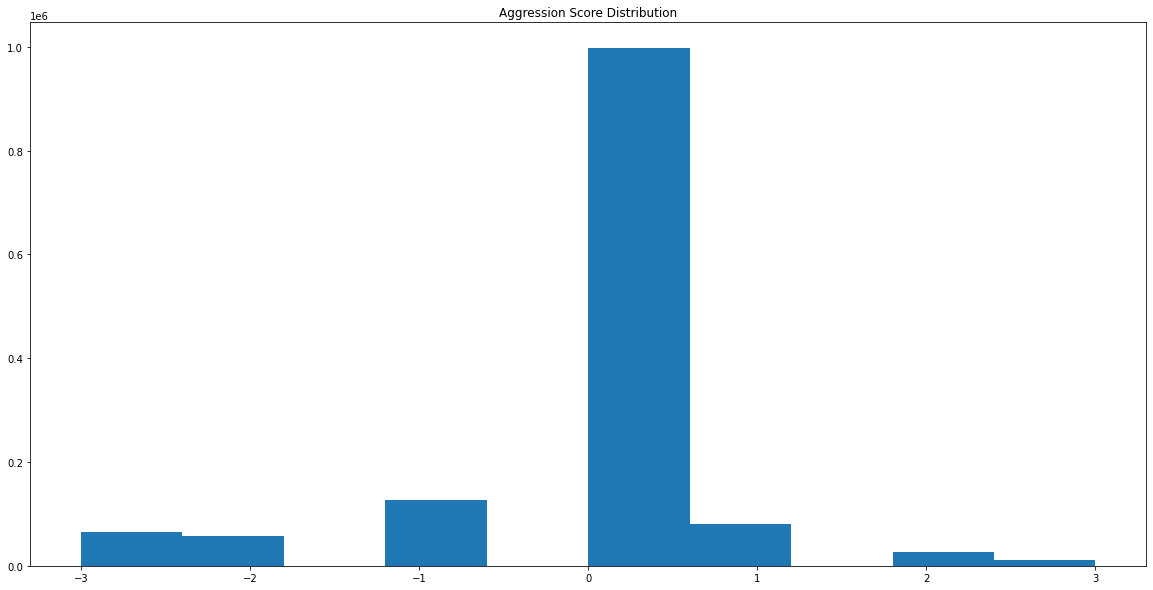

In [21]:
plt.hist(aggressions_df.aggression_score)
plt.title("Aggression Score Distribution")

While neutral comments are highly dominant in here, there appears to be slightly more aggressive comments than healthy comments.

#### Aggression Ratio

Text(0.5, 1.0, 'Aggression Ratio Over Time')

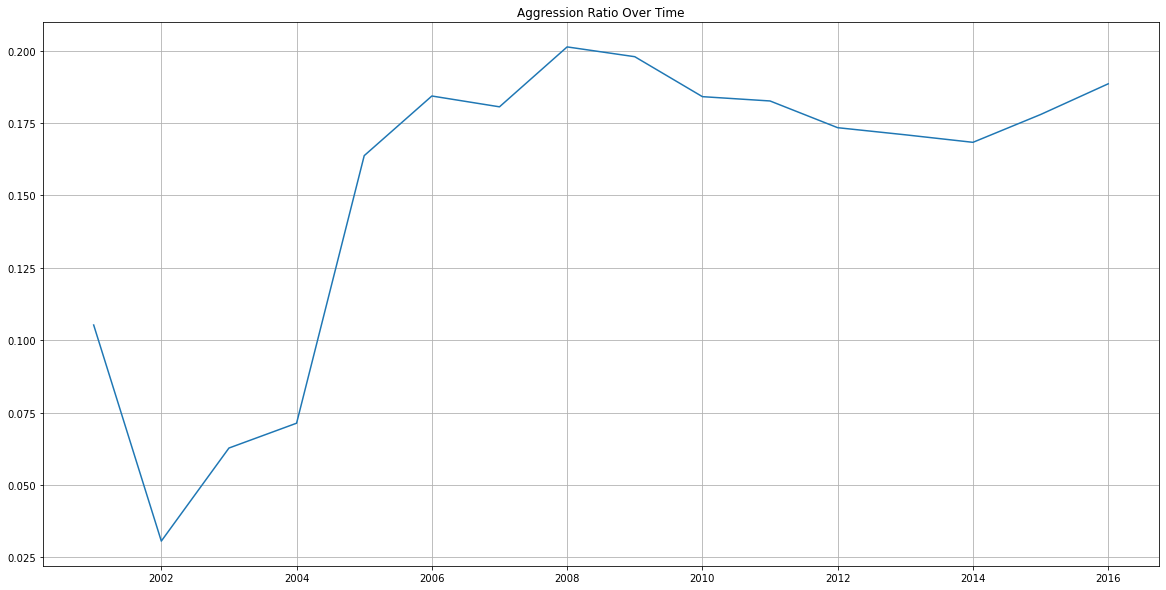

In [30]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(aggressions_df_trend.year, aggressions_df_trend.aggression_ratio)
plt.grid(True)
plt.title("Aggression Ratio Over Time")

#### Agression Score

Text(0.5, 1.0, 'Aggression Score Over Time')

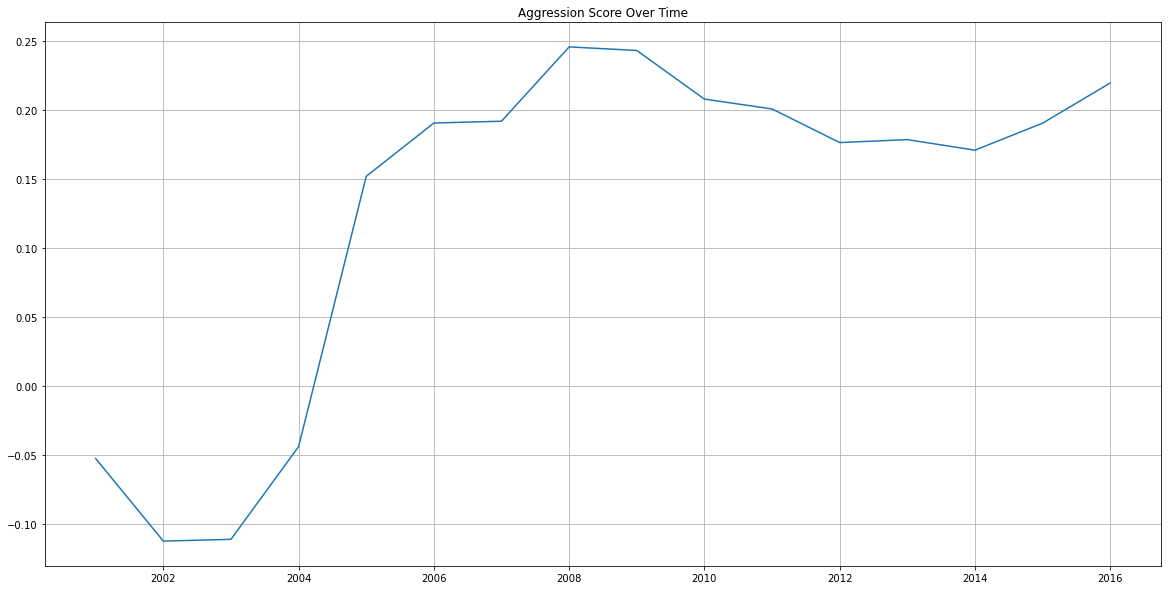

In [23]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(aggressions_df_trend.year, aggressions_df_trend.aggression_score_reversed)
plt.grid(True)
plt.title("Aggression Score Over Time")

The overall trend here is similar to what we saw with toxicity.  There appears to be a sharp increase until year 2008 at its peak, plateauing consistently afterwards.  The scoress however, appear to reach positive values before its peak at 2005 and remaining positive.  While most comments appear to be neutral, there are more aggressive comments than healthy comments.  

### Lets look at the difference of log in vs not logged in

#### Preprocessing

In [24]:
col_rename = {'rev_id':'count'}
aggressions_df_trend_logged_in = aggressions_df[aggressions_df.logged_in == True].groupby('year').agg({'rev_id':'count', 'aggression':'sum', 'aggression_score':'mean'}).reset_index().rename(columns = col_rename)
aggressions_df_trend_logged_in['aggression_ratio'] = aggressions_df_trend_logged_in['aggression'] / aggressions_df_trend_logged_in['count']
aggressions_df_trend_logged_in['aggression_score_reversed'] = -1 * aggressions_df_trend_logged_in['aggression_score']
aggressions_df_trend_not_logged_in = aggressions_df[aggressions_df.logged_in == False].groupby('year').agg({'rev_id':'count', 'aggression':'sum', 'aggression_score':'mean'}).reset_index().rename(columns = col_rename)
aggressions_df_trend_not_logged_in['aggression_ratio'] = aggressions_df_trend_not_logged_in['aggression'] / aggressions_df_trend_not_logged_in['count']
aggressions_df_trend_not_logged_in['aggression_score_reversed'] = -1 * aggressions_df_trend_not_logged_in['aggression_score']



#### Aggression Ratio Log In

Text(0.5, 1.0, 'Aggression Ratio Over Time')

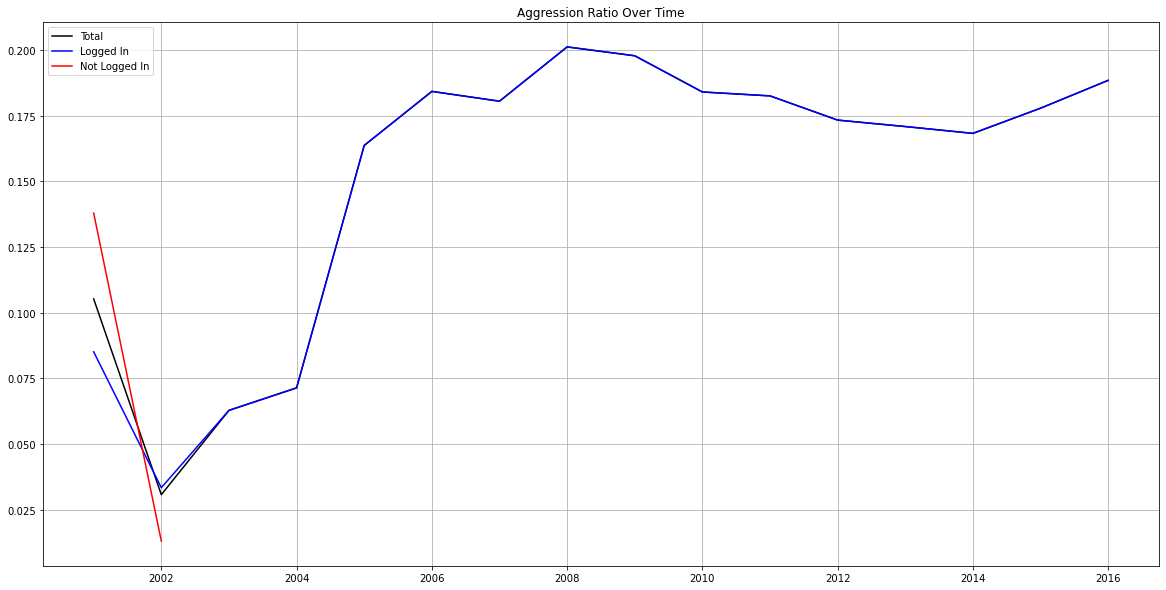

In [25]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(aggressions_df_trend.year, aggressions_df_trend.aggression_ratio, color = 'black', label ='Total')
plt.plot(aggressions_df_trend_logged_in.year, aggressions_df_trend_logged_in.aggression_ratio, color = 'blue', label ='Logged In')
plt.plot(aggressions_df_trend_not_logged_in.year, aggressions_df_trend_not_logged_in.aggression_ratio, color = 'red', label ='Not Logged In')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Aggression Ratio Over Time")

In [26]:
aggressions_df[aggressions_df.logged_in == False].year.unique()

array([2002, 2001])

Aggressions dataset appears to not have any data on comments made without logging in after year 2002.

### Lets look at the difference of blocked vs randomly sampled sources

#### Preprocessing

In [27]:
col_rename = {'rev_id':'count'}
aggressions_df_trend_blocked = aggressions_df[aggressions_df['sample'] == 'blocked'].groupby('year').agg({'rev_id':'count', 'aggression':'sum', 'aggression_score':'mean'}).reset_index().rename(columns = col_rename)
aggressions_df_trend_blocked['aggression_ratio'] = aggressions_df_trend_blocked['aggression'] / aggressions_df_trend_blocked['count']
aggressions_df_trend_blocked['aggression_score_reversed'] = -1 * aggressions_df_trend_blocked['aggression_score']
aggressions_df_trend_random = aggressions_df[aggressions_df['sample'] == 'random'].groupby('year').agg({'rev_id':'count', 'aggression':'sum', 'aggression_score':'mean'}).reset_index().rename(columns = col_rename)
aggressions_df_trend_random['aggression_ratio'] = aggressions_df_trend_random['aggression'] / aggressions_df_trend_random['count']
aggressions_df_trend_random['aggression_score_reversed'] = -1 * aggressions_df_trend_random['aggression_score']


#### Aggression Ratio Sampling

Text(0.5, 1.0, 'Aggression Ratio Over Time')

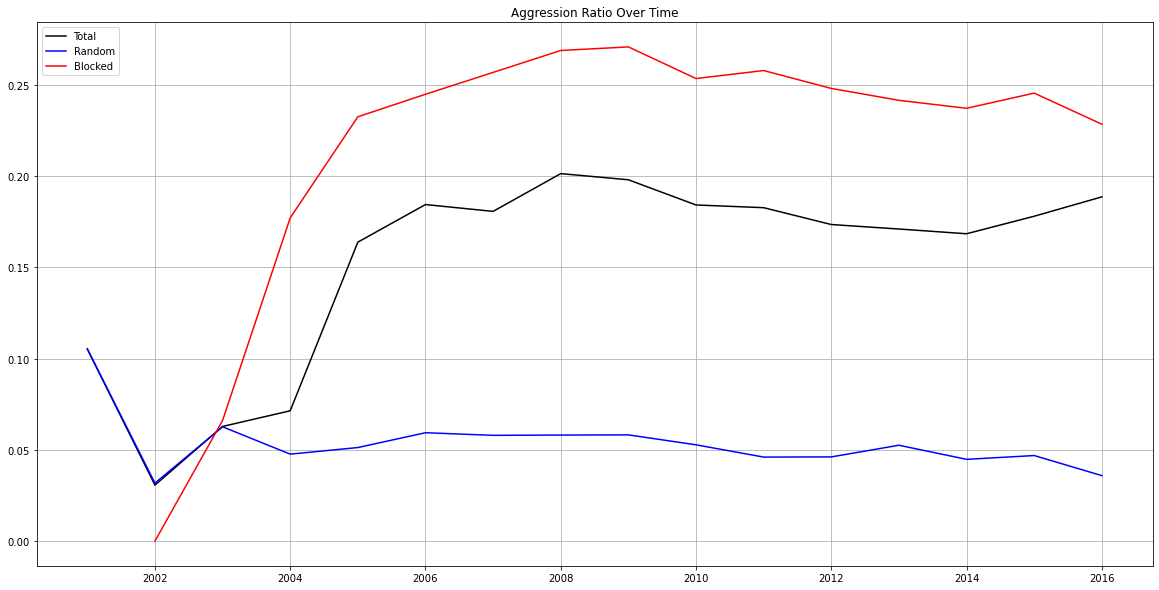

In [28]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(aggressions_df_trend.year, aggressions_df_trend.aggression_ratio, color = 'black', label ='Total')
plt.plot(aggressions_df_trend_random.year, aggressions_df_trend_random.aggression_ratio, color = 'blue', label ='Random')
plt.plot(aggressions_df_trend_blocked.year, aggressions_df_trend_blocked.aggression_ratio, color = 'red', label ='Blocked')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Aggression Ratio Over Time")

#### Aggression Score Sampling

Text(0.5, 1.0, 'Aggression Score Over Time')

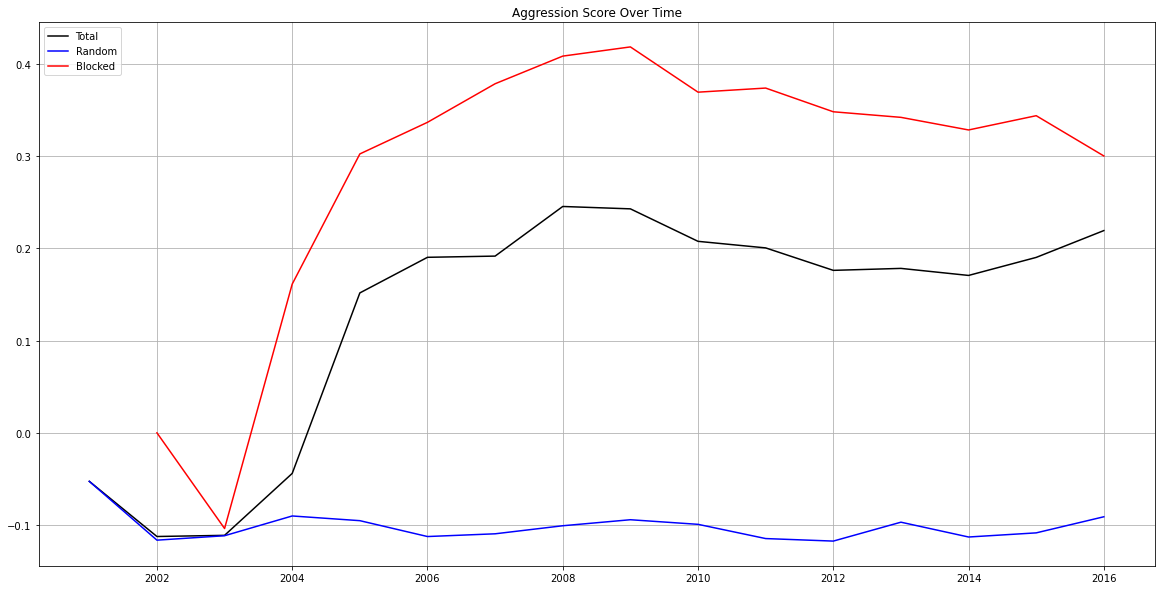

In [29]:
plt.figure()
plt.ticklabel_format(style='plain')
plt.plot(aggressions_df_trend.year, aggressions_df_trend.aggression_score_reversed, color = 'black', label ='Total')
plt.plot(aggressions_df_trend_random.year, aggressions_df_trend_random.aggression_score_reversed, color = 'blue', label ='Random')
plt.plot(aggressions_df_trend_blocked.year, aggressions_df_trend_blocked.aggression_score_reversed, color = 'red', label ='Blocked')
plt.legend(loc = "upper left")
plt.grid(True)
plt.title("Aggression Score Over Time")

The results are similar to what was found for toxicity.  The Blocked source has a much a higher score than the total and randomly sampled source.  Additionally, the Randomly sampled source has a consistent score throughout the entire date range.  Toxicity and Aggression appear to move similarly as aggressive comments indicate higher toxicity.

# Further Implications:

Which, if any, of these demo applications would you expect the Perspective API—or any model trained on the Wikipedia Talk corpus—to perform well in? Why?

The Perspective API would perform well as long as it is tracking the same subject.  For example, the model would be excellent in detecting Toxicity or Severe Toxicity, using the data trained on Wikipedia's Toxicity dataset.  Since there is a specifically designation of whether a comment is toxic or not, along with the assigned score for the severity of toxicity, the model would perform well. 


Which, if any, of these demo applications would you expect the Perspective API to perform poorly in? Why?

However, the Perspective API would not perform so well on a different topic.  For example, it would perform poorly in rating Sexually Explicity comments as the Wikipedia Talk corpus doesn't have a scoring for any sexually explicit comments.  The Perspective API would perform poorly on scoring a subject that it does not have the fitting training data on. 

What are some potential unintended, negative consequences of using the Perspective API for any of these purposes? In your opinion, are these consequences likely or serious enough that you would recommend that the Perspective API not be used in these applications? Why or why not?

There may be unintentional cultural discrimination through the use of Perspective API.  One comment may be unintentionally offensive or viewed improper based on a culture.  Additionally, if the scorers are not demographically diverse in culture, age, race, sex, and income, there can be the consequence of discrimination to a certain group.  Whether the Perspective API be used or not would depend on the seriousness of the bias that results in a machine learned model, but the use of the API would help filter out offensive comments much quicker than a human reader would be able to.  